# Librairies

In [6]:
%pylab inline

import csv, os
import theano, theano.tensor as T
import theano_lstm as TLSTM

Populating the interactive namespace from numpy and matplotlib


# Data loading

In [2]:
data_to_charge = 0 # 0 is for the music samples, 1 is for TIMIT

In [3]:
if data_to_charge not in (0, 1):
    raise ValueError("data_to_charge must be 0 (music) or 1 (speech)")
elif data_to_charge == 0:
    data_folder = "../sample/"
else:
    data_folder = "../timit"

files_names = (os.listdir(data_folder))
folder_size = len(files_names)
sample_lenght = 0

cr = csv.reader(open(data_folder + files_names[0], "r"))
for row in cr:
    sample_lenght += 1

data = np.zeros((folder_size, sample_lenght, 2)) # 2 is for right/left signals
    
for file_number, file in enumerate(files_names):
    cr = csv.reader(open(data_folder + file, "r"))
    for row_number, row in enumerate(cr):
        data[file_number][row_number] = [float(row[0]), float(row[1])]

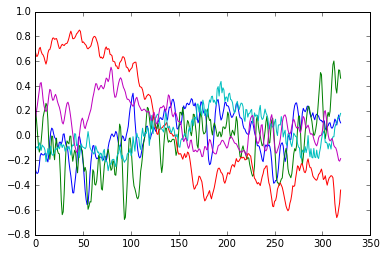

In [4]:
for i in range(folder_size):
    plot(data[i][:,0])

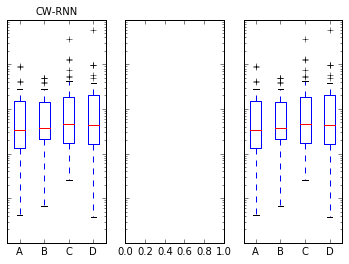

In [56]:

np.random.seed(937)
data = np.random.lognormal(size=(37, 4), mean=1.5, sigma=1.75)
labels = list('ABCD')

# compute the boxplot stats
stats = cbook.boxplot_stats(data, labels=labels, bootstrap=10000)
# After we've computed the stats, we can go through and change anything.
# Just to prove it, I'll set the median of each set to the median of all
# the data, and double the means
for n in range(len(stats)):
    stats[n]['med'] = np.median(data)
    stats[n]['mean'] *= 2

print(stats[0].keys())
fs = 10  # fontsize

# demonstrate how to toggle the display of different elements:    
fig, axes = plt.subplots(1, 3, sharey=True)
axes[0].boxplot(data, labels=labels)
axes[0].set_title('CW-RNN', fontsize=fs)
axes[2].boxplot(data, labels=labels)
    

for ax in axes.flatten():
    ax.set_yscale('log')
    ax.set_yticklabels([])
    
fig.subplots_adjust(hspace=0.4)
plt.show()



# Raw algorithms

## RNN

In [10]:
model = TLSTM.StackedCells(2, layers=[10,1], activation=T.tanh, celltype=TLSTM.RNN)

In [16]:
def step(x, *prev_hiddens):
    new_states = model.forward(x, prev_hiddens, dropout)
    return [dynamics(x, new_states[-1])] + new_states[:-1]

In [17]:
def step(idx, *states):
    new_hiddens = [None] + list(states)
            
    new_states = self.model.forward(idx, prev_hiddens = new_hiddens)
    return new_states[1:]

## LSTM

## CW-RNN